In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
nadia = cv2.imread('../DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('../DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread('../DATA/solvay_conference.jpg',0)

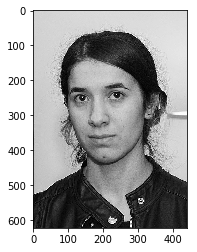

In [7]:
plt.imshow(nadia,cmap = 'gray')

In [4]:
face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')

In [5]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(img=face_img, pt1=(x,y), pt2=(x+w,y+h), color=(255,0,0), thickness=3)
        
    return face_img

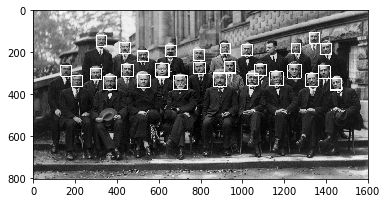

In [16]:
plt.imshow(detect_face(solvay),cmap = 'gray')

In [13]:
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml')

In [17]:
def detect_eye(img):
    eye_img = img.copy()
    eye_rects = face_cascade.detectMultiScale(eye_img,scaleFactor=1.2, minNeighbors=5)
    
    for (x,y,w,h) in eye_rects:
        cv2.rectangle(img=eye_img, pt1=(x,y), pt2=(x+w,y+h), color=(255,0,0), thickness=3)
        
    return eye_img

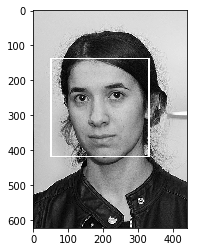

In [18]:
result = detect_eye(nadia)
plt.imshow(result,cmap = 'gray')

In [7]:
cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read(0)
    frame = detect_face(frame)
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()        
cv2.destroyAllWindows()